# Import libraries

In [1]:
import pandas as pd

from deeplcms_functions import convert_lcms_files, inspect_database, utils

# Testing

In [2]:
example_file = utils.Configuration.RAW_DATA_PATH.joinpath(
    "ST002432_IIV_Metformin/YW_20201206_047.mzML"
)

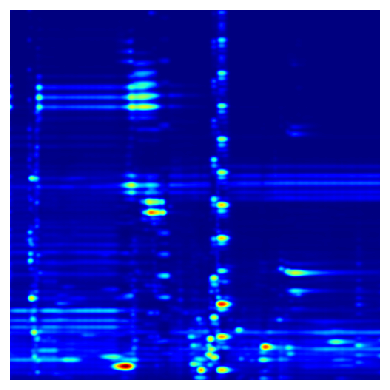

In [3]:
convert_lcms_files.plot_2D_spectra_overview(example_file, save=False)

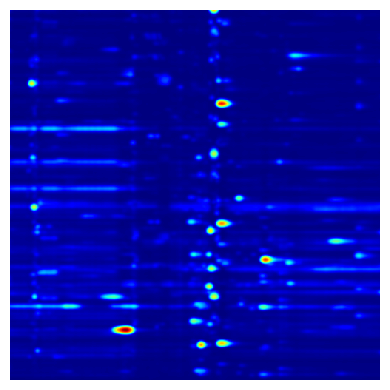

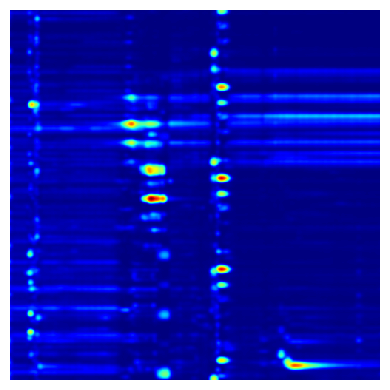

In [4]:
convert_lcms_files.plot_2D_spectra_slices(
    example_file, save=False, show=True, num_slices=2
)

# Step 1

In [5]:
convert_lcms_files.create_train_val_test_directories(
    study_name="experiment",
    path=r"C:\Users\s0212777\OneDrive - Universiteit Antwerpen\Jupyter_projects\Articles\DeepLCMS\data",
    group_1="Placebo",
    group_2="Metformin",
)

C:\Users\s0212777\OneDrive - Universiteit Antwerpen\Jupyter_projects\Articles\DeepLCMS\data\experiment\train\Placebo
C:\Users\s0212777\OneDrive - Universiteit Antwerpen\Jupyter_projects\Articles\DeepLCMS\data\experiment\train\Metformin
C:\Users\s0212777\OneDrive - Universiteit Antwerpen\Jupyter_projects\Articles\DeepLCMS\data\experiment\val\Placebo
C:\Users\s0212777\OneDrive - Universiteit Antwerpen\Jupyter_projects\Articles\DeepLCMS\data\experiment\val\Metformin
C:\Users\s0212777\OneDrive - Universiteit Antwerpen\Jupyter_projects\Articles\DeepLCMS\data\experiment\test\Placebo
C:\Users\s0212777\OneDrive - Universiteit Antwerpen\Jupyter_projects\Articles\DeepLCMS\data\experiment\test\Metformin


# Step 2

In [6]:
file_path = utils.Configuration.RAW_DATA_PATH.joinpath("sample_list.parquet.gzip")

# pd.read_parquet(file_path)
train_test_val_split_df = convert_lcms_files.get_train_val_test_split(
    path=file_path, test_portion=0.1, val_portion=0.2
)
train_test_val_split_df

,mb_sample_id,sample_name,visit,treatment,split
0,SA243004,YW_20201206_071,V1,Metformin,train
1,SA243001,YW_20201206_072,V1,Metformin,test
2,SA243002,YW_20201206_089,V1,Metformin,train
3,SA243010,YW_20201206_090,V1,Metformin,train
4,SA242999,YW_20201206_101,V1,Metformin,train
...,...,...,...,...,...
355,SA243335,YW_20201210_186,V6,Placebo,val
356,SA243340,YW_20201210_233,V6,Placebo,train
357,SA243345,YW_20201210_234,V6,Placebo,val
358,SA243343,YW_20201210_255,V6,Placebo,train


# Step 3

In [7]:
convert_lcms_files.copy_LCMS_files(
    df=train_test_val_split_df,
    source_folder=utils.Configuration.RAW_DATA_PATH.joinpath("ST002432_IIV_Metformin"),
    destination_folder=utils.Configuration.RAW_DATA_PATH.parent.joinpath("experiment"),
    target_col="treatment",
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:11<00:00,  3.91s/it]
